# Part I - Exploration of flights information for US airlines


## Introduction


<font size=4>
<font size=4>this data regroups valuable information for over thousands of flights over the course of 5 years. It is mainly focused on departure and arrival  times, delays and cancellation.

> <font color='blue'>**Steps of this exploration:**</font>  
>
>Cleaning data.
>
>Storing data.
>
>Defining some useful functions 
>
>Exploring data </font>
    
    
## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

<font size=5>**Cleaning process:**
    
<font size=4>- rename columns
    
<font size=4>- remove columns with only null values
    
<font size=4>- drop rows with null values for delays and cancelled
    
<font size=4>- replace the values for day of the week column from number to the name of the day
    
<font size=4>- drop irrelevant columns

    
<font size=4, color='blue'> A way to do things is : 

<font size=4>1) Execute a cleaning loop over the csv files,except 2001 and 2002 files that need a different encoding

<font size=4>2) store in a mySQL database

<font size=4>3) explore the data

<font size=4, color='blue'> Due to the high processing times, only data for 5 years was concatanated

<font size=5>**Among the questions to answer, we can list the following:**

<font size=4>1) proportion of delay in arrival compared to departue : what is the most frequent

     
<font size=4>2) what are the destination / origin with most frequent delays:what are the top 3  for each year 
    
<font size=4>3) does the day of the month affects?average of delays for everyday with a <font color ='red'>lineplot to compare the years<font>
    
<font size=4>4)  does the day of the week affects average for each of the 7 days for each year <font color ='red'>scatterplot<font color ='red'>
    
<font size=4>5) show the average of delays for the months and compare plot  : <font color ='red'>boxplot with x as months and average for each year<font color ='red'>
    
<font size=4>6) does the dep time affects:  delays in function of the departure time:<font color ='red'>histogram to find the peaks of departure. divide in range to compare<font color ='red'>
    
<font size=4>7) does the duration of the flight affects , are long distance more regular?<font color ='red'>scatter of distance in function of the average of delays<font color ='red'>

<font size=4>8) delays for each carrier : violin plot
    
<font size=4>9) delays for each carrier for each origin
    

# Cleaning

In [ ]:
years=list(range(1989,2001))+ list(range(2003,2007))         
liste =[str(i)+'.csv' for i in years]

In [ ]:

#for i in liste:
#    df=pd.read_csv(i)
# some columns are not ofrelevance for this anlaysis
#    df.drop(['TaxiIn','TaxiOut','TailNum'], axis=1,inplace=True)
#Remove columns with only null values
#    df.dropna(axis=1,how='all',inplace=True)
#Change columns name and lowercase all
#    df.rename(columns={'DayofMonth':'Day','UniqueCarrier':'carrier'},inplace=True)
#    df.columns=df.columns.str.lower()
#change day of the week to the name of the day for better understanding
#    df.dayofweek.replace({1:'mond',2:'Tue',3:'wed',4:'thurs',5:'frid',6:'sat',7:'sun'},inplace=True)
#dro npull rows
#    df.drop(df.loc[df.cancelled.isnull()].index,axis=0,inplace=True) 
#    df.to_csv(i,index=False)

<font size=5> 2001 and 2002 CSV files needed a different encoding

In [ ]:
#df1=pd.read_csv('2001.csv', encoding='latin-1')
# some columns are not ofrelevance for this anlaysis
#df1.drop(['TaxiIn','TaxiOut','TailNum'], axis=1 ,inplace=True)
#df1.dropna(axis=1,how='all',inplace=True)
#df1.rename(columns={'DayofMonth':'Day','UniqueCarrier':'carrier'},inplace=True)
#df1.columns=df1.columns.str.lower()
#df1.dayofweek.replace({1:'mond',2:'Tue',3:'wed',4:'thurs',5:'frid',6:'sat',7:'sun'},inplace=True)

#drop null rows
#df1.drop(df1.loc[df1.cancelled.isnull()].index,axis=0,inplace=True)
#df1.to_csv('2001.csv',index=False)

In [ ]:
#df1=pd.read_csv('2002.csv', encoding='latin-1')
# some columns are not ofrelevance for this anlaysis
#df1.drop(['TaxiIn','TaxiOut','TailNum'], axis=1,inplace=True)
#df1.dropna(axis=1,how='all',inplace=True)
#df1.rename(columns={'DayofMonth':'Day','UniqueCarrier':'carrier'},inplace=True)
#df1.columns=df1.columns.str.lower()
#df1.dayofweek.replace({1:'mond',2:'Tue',3:'wed',4:'thurs',5:'frid',6:'sat',7:'sun'},inplace=True)

#dropullrows
#df1.drop(df1.loc[df1.cancelled.isnull()].index,axis=0,inplace=True)
#df1.to_csv('2002.csv',index=False)

In [12]:
d=['2001.csv','2002.csv']
for i in d:
    df=pd.read_csv(i, encoding='latin-1')
    print(df.columns)

Index(['year', 'month', 'day', 'dayofweek', 'deptime', 'crsdeptime', 'arrtime',
       'crsarrtime', 'carrier', 'flightnum', 'actualelapsedtime',
       'crselapsedtime', 'arrdelay', 'depdelay', 'origin', 'dest', 'distance',
       'cancelled', 'diverted'],
      dtype='object')
Index(['year', 'month', 'day', 'dayofweek', 'deptime', 'crsdeptime', 'arrtime',
       'crsarrtime', 'carrier', 'flightnum', 'actualelapsedtime',
       'crselapsedtime', 'airtime', 'arrdelay', 'depdelay', 'origin', 'dest',
       'distance', 'cancelled', 'diverted'],
      dtype='object')


 # <font size=  5>Store data in a mySQL database

<font color ='blue' size =4> starting from 2004 new columns were added for the type of delay so two databases will be created.: 

<font color ='blue' size=4>  One with only the common columns for all the files (flight_table) and one for 2003 and above (flight_over2003)

In [ ]:
from pathlib import Path
Path('my_data.db').touch()

In [ ]:
# create DB connection and cursor to execute queries
import sqlite3
conn = sqlite3.connect('my_data.db')
c = conn.cursor()

In [ ]:
# once it is set we can change the name of the table, it will create a new one in sqlite utomatically
c.execute('''CREATE TABLE flights_table (year int, month int, day int, dayofweek text, deptime float, crsdeptime int,
arrtime float,
       crsarrtime int, carrier text, flightnum int, actualelapsedtime float,
       crselapsedtime int,  arrdelay float, depdelay float, origin text, dest text,
       distance float, cancelled int, diverted int)''')

In [22]:
# airtime column is null for many years, we need to drop it for all the years to be able to save the files to the database
years=list(range(1995,2001))+ list(range(2003,2007))       
liste3 =[str(i)+'.csv' for i in years]
for i in liste:
    df=pd.read_csv(i)
    df=df[['year', 'month', 'day', 'dayofweek', 'deptime', 'crsdeptime', 'arrtime',
       'crsarrtime', 'carrier', 'flightnum', 'actualelapsedtime',
       'crselapsedtime', 'arrdelay', 'depdelay', 'origin', 'dest', 'distance',
       'cancelled', 'diverted']]
    df.to_sql('flights_table',conn,if_exists='append', index=False)

In [ ]:
# due to the different encoding , the data for 2001 and 2002 will be appended separately
two=['2001.csv','2002.csv']
for i in two:
    df=pd.read_csv(i,encoding='latin-1')
    df=df[['year', 'month', 'day', 'dayofweek', 'deptime', 'crsdeptime', 'arrtime',
       'crsarrtime', 'carrier', 'flightnum', 'actualelapsedtime',
       'crselapsedtime', 'arrdelay', 'depdelay', 'origin', 'dest', 'distance',
       'cancelled', 'diverted']]
    df.to_sql('flights_table',conn,if_exists='append', index=False)

# Create new database for the 2004 and above

In [ ]:
# Since 2004, interesting columns were added to the CSV files to shed lights on the delays reasons. A way to do things,
#is to create another database with these extra columns and compare data for these years only
c.execute('''CREATE TABLE flights_over2004 (year int, month int, day int, dayofweek text, deptime float, crsdeptime int,
arrtime float, crsarrtime int, carrier text, flightnum int, actualelapsedtime float,
       crselapsedtime float,  arrdelay float, depdelay float, origin text, dest text,
       distance it, cancelled int, cancellationcode float,diverted int,carrierdelay float,weatherdelay float, nasdelay float, securitydelay float, lateaircraftdelay float)''')

In [5]:
years=list(range(2004,2009))  
liste =[str(i)+'.csv' for i in years]
# save data to sqlite
for i in liste:
    df=pd.read_csv(i)
    df=df[['year', 'month', 'day', 'dayofweek', 'deptime', 'crsdeptime', 'arrtime',
       'crsarrtime', 'carrier', 'flightnum', 'actualelapsedtime',
       'crselapsedtime', 'arrdelay', 'depdelay', 'origin', 'dest', 'distance',
       'cancelled', 'cancellationcode', 'diverted', 'carrierdelay',
       'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay']]
   
    df.to_sql('flights_over2004',conn,if_exists='append', index=False)

# Functions

In [5]:
def scat_plot(data,x,y,labels):
    '''generate a scatter plot to compare results between years'''
    sb.scatterplot(data=data, x=x, y=y, hue=data.year,palette='deep')
    plt.xticks(rotation=45)
    plt.legend(labels=data)
    plt.figure(figsize=[14.70, 8.27])

# Load Data

<font size=4>Due to the high volume of data it it is difficult to analyze all the database table. The data will be then analyzed by chunks

In [2]:
years=list(range(2004,2009))         
liste =[str(i)+'.csv' for i in years]
liste

['2004.csv', '2005.csv', '2006.csv', '2007.csv', '2008.csv']

<font size=4>Drop coumns with null values. Null values for departure time are for canceled flights

In [6]:
df1=pd.DataFrame()
for i in liste: 
    df=pd.read_csv(i)
    df=df[['year', 'month', 'day', 'dayofweek', 'deptime', 'crsdeptime', 'arrtime',
       'crsarrtime', 'carrier', 'flightnum', 'actualelapsedtime',
       'crselapsedtime', 'arrdelay', 'depdelay', 'origin', 'dest', 'distance',
       'cancelled', 'cancellationcode', 'diverted', 'carrierdelay',
       'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay']]
    df_notcan=df[df.deptime.notnull()]
  
    df1=pd.concat([df1,df_notcan])
print(df1.shape)

(30645609, 25)


In [7]:
#df2=pd.DataFrame()
#for i in liste: 
#    df=pd.read_csv(i)
#    df=df[['year', 'month', 'day', 'dayofweek', 'deptime', 'crsdeptime', 'arrtime',
       'crsarrtime', 'carrier', 'flightnum', 'actualelapsedtime',
       'crselapsedtime', 'arrdelay', 'depdelay', 'origin', 'dest', 'distance',
       'cancelled', 'cancellationcode', 'diverted', 'carrierdelay',
       'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay']]
#    df_can=df[df.deptime.isnull()]
#    df2=pd.concat([df2,df_can])
#print(df2.shape)




(608611, 25)


<font size=5> Save cleaned data to a CSV file

In [8]:
# Saving the cleaned dataset will help reduce the procesing time each time the notebook is run
#df1.to_csv('2004-2008.csv',index=False)

In [2]:
# df1 regroups all the flights except the cancelled ones
df1=pd.read_csv('2004-2008.csv', low_memory=False)

C:\Users\Fatma\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
#df2.to_csv('2004-2008-can.csv',index=False)

In [3]:
#df2 has only cancelled flights
df2=pd.read_csv('2004-2008-can.csv')
df2.shape

(608611, 25)

## 1) More delays for arrvials or departures?

In [5]:
# calculate the percentage of departure delays for each year
for i in df1.year.unique():
    x=df1.loc[df1.year==i].depdelay.value_counts()
    x_ok=x[x.index<=0]
    x_no_ok=x[x.index>0]
    percentage_dep_delay=x_no_ok.sum()*100/(x.sum())
    print('percentage of departure delay',i, percentage_dep_delay)

percentage of departure delay 2004 34.45945183562467
percentage of departure delay 2005 36.21963085921723
percentage of departure delay 2006 40.251564532588944
percentage of departure delay 2007 43.12414440819547
percentage of departure delay 2008 42.73729715778946


In [6]:
# calculate the percentage of arrival delays for each year
for i in df1.year.unique():
    y=df1.loc[df1.year == i].arrdelay.value_counts()
    y_ok=y[y.index<=0]
    y_no_ok=y[y.index>0]
    y_ok.sum(),y_no_ok.sum()
    percentage_arr_delay=y_no_ok.sum()*100/(y.sum())
    print('percentage of arrival delay', i, percentage_arr_delay)

percentage of arrival delay 2004 43.19632315448982
percentage of arrival delay 2005 43.805133194848786
percentage of arrival delay 2006 45.651861660281085
percentage of arrival delay 2007 47.468292664152955
percentage of arrival delay 2008 47.82100632092935


<font color='green' size=5>There's more delay in arrivals than in departure.It is more probable to have a delay in arrival than to arrive on time
    
<font color='green' size=5> The interesting conclusion here is that both delays kept increasing each year

In [7]:
# arrelays dataset has only flights with arrival times in range of more or less 2 hours from the scheduled time
arrdelays=pd.DataFrame(df1.arrdelay.value_counts())
arrdelays.reset_index(inplace=True)
arrdelays.columns=['Arrival delays','count']
arrdelays.drop(0,inplace=True)
delays2=arrdelays.loc[(arrdelays['Arrival delays'] >-120)&(arrdelays['Arrival delays'] <120) ]
#delays2=arrdelays

In [8]:
#delays dataset has only flights with departure times in range of more or less 2 hours from the scheduled time
delays=pd.DataFrame(df1.depdelay.value_counts())
delays.reset_index(inplace=True)
delays.columns=['Departure delays','count']
delays.drop(0,inplace=True)
delays1=delays.loc[(delays['Departure delays'] >-120)&(delays['Departure delays'] <120) ]
#delays1=delays

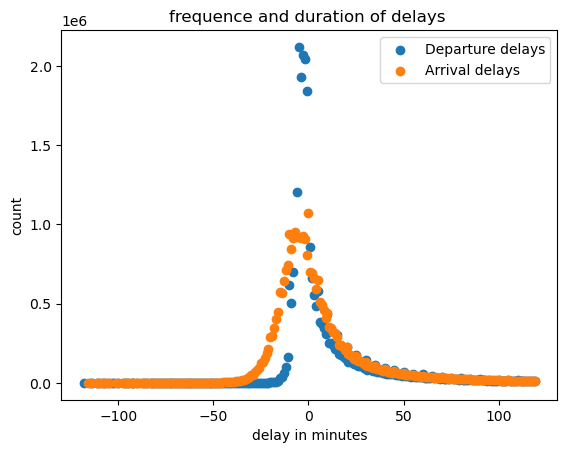

In [237]:
plt.scatter(delays1['Departure delays'],delays1['count'])
plt.scatter(delays2['Arrival delays'],delays2['count'])
plt.legend(['Departure delays','Arrival delays'])
plt.xlabel('delay in minutes')
plt.ylabel('count')
plt.title('frequence and duration of delays ')
plt.show();

<font size =5 color='green'>The majority of variation in departure and arrivals is more or less one hour

# 5) show the average of delays for the months 

In [30]:
# df_delay_year groups data by year and month , meaning 12 rows for each year 
df_delay_year=df1.groupby(['year','month']).mean()

In [31]:
df_delay_year.reset_index(inplace=True)

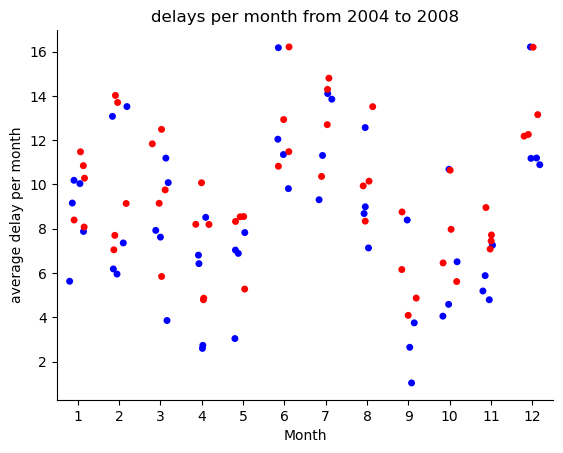

In [40]:
sb.stripplot('month','arrdelay',data=df_delay_year,jitter=0.2,label='arrival', color='blue')
sb.stripplot('month','depdelay',data=df_delay_year,jitter=0.2,label='departure',color='red')
sb.despine()

plt.xlabel('Month')
plt.ylabel('average delay per month')
plt.title('delays per month from 2004 to 2008')
plt.show;

<font size=5, color='green' >Summer and holiday seasons are the periods with the highest delays</font>

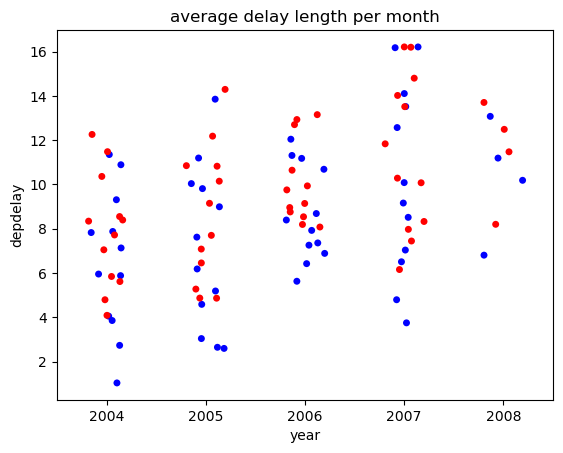

In [45]:
#de_delay_year have the aerage of delays for each month for each of the 5 years
sb.stripplot('year','arrdelay',data=df_delay_year,jitter=0.2,label='arrival', color='blue')
sb.stripplot('year','depdelay',data=df_delay_year,jitter=0.2,label='departure', color='red')
plt.title('average delay length per month');


<font size= 5 color='green'> Delays have shown a steady increase over the years, is it due to the number of flights? is it the same for all the carriers and airports?

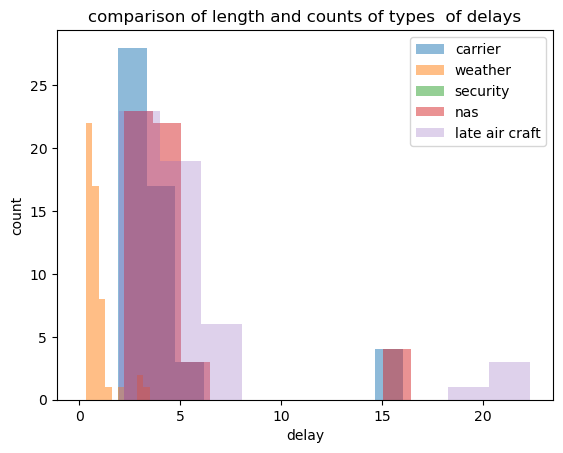

In [15]:
# to compare the types of delay, we plot the histogram representing the count of flight aith each average duration of delay
plt.hist(df_delay_year.carrierdelay,label='carrier', alpha=0.5)
plt.hist(df_delay_year.weatherdelay, label='weather',alpha=0.5)
plt.hist(df_delay_year.securitydelay,label='security',alpha=0.5)
plt.hist(df_delay_year.nasdelay,label='nas',alpha=0.5)
plt.hist(df_delay_year.lateaircraftdelay, alpha=0.3, label='late air craft')
plt.xlabel('delay')
plt.ylabel('count')
plt.title('comparison of length and counts of types  of delays')
plt.legend();

<font size=5, color='green'>security check has the shortest delays whereas late air craft and carrier cause the longest delays. let's see how frequent is each type of delay

According to bts.gov :'National Aviation System (NAS): Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control'

# 7) does the duration of the flight affects , are long distance more regular?<font color ='red'>scatter of distance in function of the average of delays<font color ='red'>


In [6]:
df_dis=df1.groupby(['year','distance']).mean()

In [7]:
df_dis.reset_index(inplace=True)

In [8]:
df_dis1=df_dis.loc[(df_dis['depdelay'] >0)&(df_dis['depdelay'] <60) ]

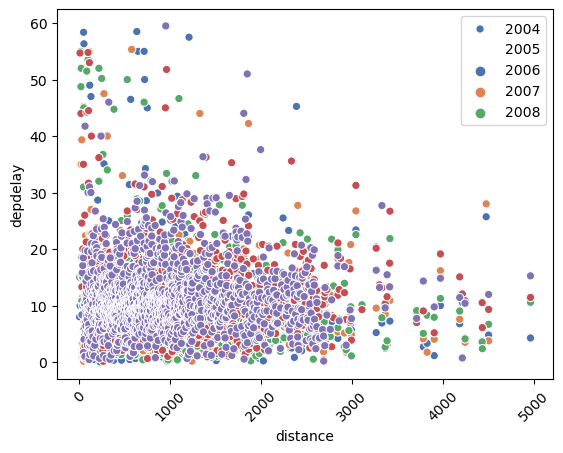

<Figure size 1470x827 with 0 Axes>

In [19]:
scat_plot(df_dis1,"distance","depdelay",labels = [2004,2005,2006,2007,2008])

<font size =4 color='green'>it seems that long distance flights are more in time.

## 2.1) which destination have the most cancelled flights


<font color='red'>What are the top 3  for each year 

In [11]:
cancel=df2.groupby(['year','origin']).sum().sort_values('cancelled',ascending=False)
cancel.reset_index(inplace=True)


In [12]:
cancel1=cancel[0:50]
cancel1.head(2)

,year,origin,month,day,deptime,crsdeptime,arrtime,crsarrtime,flightnum,actualelapsedtime,...,arrdelay,depdelay,distance,cancelled,diverted,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
0,2007,ORD,100991,259386,0.0,24117288,0.0,27452972,60379346,0.0,...,0.0,0.0,8992023,16615,0,0.0,0.0,0.0,0.0,0.0
1,2005,ATL,79272,241260,0.0,20085214,0.0,21084349,33610539,0.0,...,0.0,0.0,7037165,13837,0,0.0,0.0,0.0,0.0,0.0


In [22]:
divert=df2.groupby(['year','origin']).sum().sort_values('diverted',ascending=False)
divert.reset_index(inplace=True)

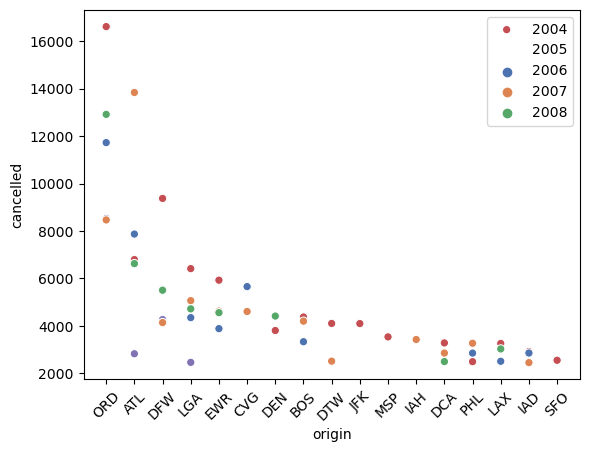

<Figure size 1470x827 with 0 Axes>

In [18]:
scat_plot(cancel1,'origin','cancelled',[2004,2005,2006,2007,2008])

<font size=5 color='green'>three origins have much higher numer of cancellation . they are :
    ORD
    ATL
    DFW

## 2.2) what is the destination with the most frequent arrival delays and the origin with the highest departure delays

In [4]:

delay_dest=df1.groupby(['year','dest']).mean().sort_values('arrdelay', ascending=False)[0:50]


In [5]:
delay_dest.reset_index(inplace=True)

In [6]:
delay_dest.head()

,year,dest,month,day,deptime,crsdeptime,arrtime,crsarrtime,flightnum,actualelapsedtime,...,arrdelay,depdelay,distance,cancelled,diverted,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
0,2008,MQT,2.549342,15.697368,1949.115132,1925.921053,1922.767442,2111.476974,4023.881579,57.485050,...,57.435216,55.562500,223.039474,0.0,0.009868,12.611842,15.513158,15.921053,0.000000,76.125000
1,2004,DUT,1.000000,13.447368,1221.526316,1166.605263,1435.421053,1372.473684,21.421053,128.631579,...,34.526316,31.763158,792.000000,0.0,0.000000,17.210526,6.236842,4.947368,0.000000,3.763158
2,2007,SOP,6.898936,15.760638,1522.654255,1460.723404,1640.096774,1600.521277,4454.196809,74.978495,...,33.844086,31.930851,297.000000,0.0,0.010638,16.510638,2.909574,5.691489,0.000000,8.617021
3,2006,ACK,7.370192,16.346154,1580.956731,1546.610577,1666.439024,1691.879808,3182.125000,82.375610,...,31.321951,30.500000,218.000000,0.0,0.014423,7.057692,1.831731,7.076923,0.086538,20.019231
4,2007,HHH,7.747917,16.366667,1414.396875,1379.281250,1530.508475,1520.417708,4552.643750,87.975636,...,30.093220,26.365625,238.783333,0.0,0.016667,15.719792,4.665625,6.281250,0.000000,4.150000


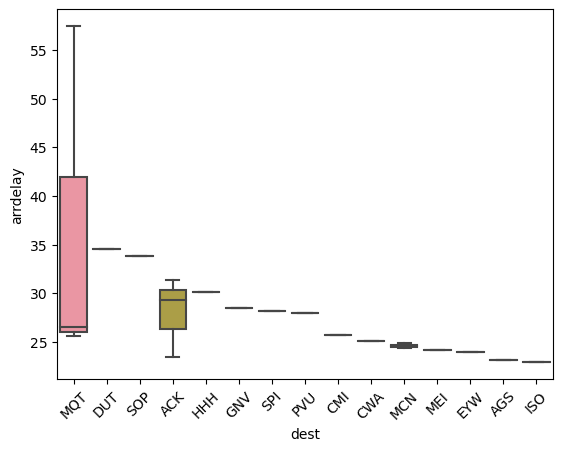

In [7]:
sb.boxplot(data=delay_dest[0:20], x='dest', y='arrdelay')
plt.xticks(rotation=45);

<font size =5, color ='green'> top 4 destinations with arrival delays are: MQT, DUT, SOP, ACK

In [8]:
df_delay_dep=df1.groupby(['year','origin']).mean().sort_values('depdelay',ascending=False)[0:50]

In [19]:
df_delay_dep.reset_index(inplace=True)
df_delay_dep.head(1)

,index,year,origin,month,day,deptime,crsdeptime,arrtime,crsarrtime,flightnum,...,arrdelay,depdelay,distance,cancelled,diverted,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
0,0,2004,FMN,10.0,14.0,1225.0,825.0,1310.0,957.0,3978.0,...,193.0,240.0,148.0,0.0,0.0,0.0,193.0,0.0,0.0,0.0


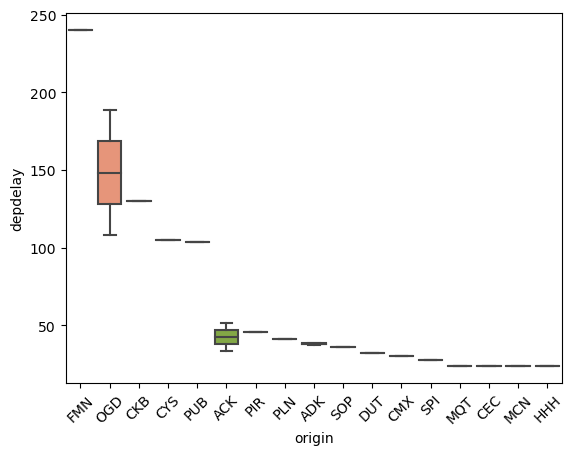

In [16]:
sb.boxplot(data=df_delay_dep[0:20], x='origin', y='depdelay')
plt.xticks(rotation=45);

<font size =5, color ='green'> top 4 orgins with departure delays are: FMN,OGD, CKB, CYS

# 3) does the day of the month affects?   

In [18]:
df1.head(2)

,year,month,day,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,carrier,flightnum,...,dest,distance,cancelled,cancellationcode,diverted,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
0,2004,1,12,mond,623.0,630,901.0,915,UA,462,...,CLT,599,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2004,1,13,Tue,621.0,630,911.0,915,UA,462,...,CLT,599,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [18]:
df1['day1']=df1['month'].astype(str)+'-'+df1['day'].astype(str)

In [16]:
delay_day=df1.groupby(['year','day1']).mean()
#.sort_values('depdelay',ascending=False)


In [20]:
delay_day.reset_index(inplace=True)

In [200]:
delay_day.shape

(1582, 19)

In [201]:
delay_day.reset_index(inplace=True)

In [202]:
delay_day.shape

(1582, 21)

In [203]:
delay_day.sort_values('depdelay', ascending=False, inplace=True)

In [204]:
# days with the highest delays
top_days=delay_day.day1[0:50]

In [205]:
top_days= pd.DataFrame(top_days)

In [206]:
top_days.head(10)

,day1
0,12-23
1,1-2
2,12-23
3,2-15
4,8-10
5,8-1
6,12-28
7,12-22
8,7-19
9,7-29


<font size=4 color='green'>Delays are more frequent around holiday season, is it due to the number of flights?
    

In [187]:
df1.shape

(30645609, 26)

In [207]:
day_frequent=df1.day1.value_counts()

In [209]:
day_frequent=pd.DataFrame(day_frequent)
day_frequent.reset_index(inplace=True)
day_frequent.columns=['day1','count_of_flights']

In [210]:
# top days with the highest number of flight
day_frequent.sort_values('count_of_flights',ascending=False)

,day1,count_of_flights
0,4-20,100235
1,4-6,100154
2,4-18,100153
3,3-14,100065
4,3-23,99973
...,...,...
361,11-24,69498
362,12-31,67700
363,12-24,66444
364,12-25,66088


In [211]:
day_frequent=day_frequent[0:50]

In [212]:
top_days.merge(day_frequent, left_on='day1',right_on='day1', how='inner')

,day1,count_of_flights
0,1-2,98705
1,2-15,96991
2,4-4,99190
3,1-3,97773
4,2-22,97020
5,3-2,98030
6,3-31,97261
7,3-19,96996


<font size=5 color='green'> only 7 days appears on the top 30 of the most crowded days and days with the highest delays. it appears that delays are not directly correlated to the number of fligts,it could be due to the lower number of stuff or more passengers in the planes

Text(0.5, 1.0, 'arrival delay per  month')

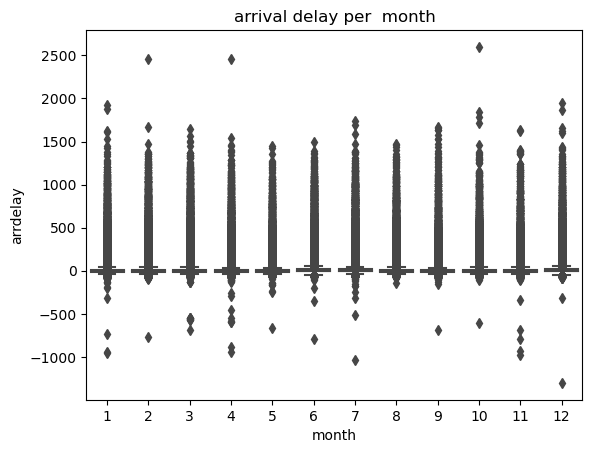

In [214]:
sb.boxplot(data=df1,x='month', y='arrdelay')
plt.title('arrival delay per  month')

Text(0.5, 1.0, 'departure delay per  month')

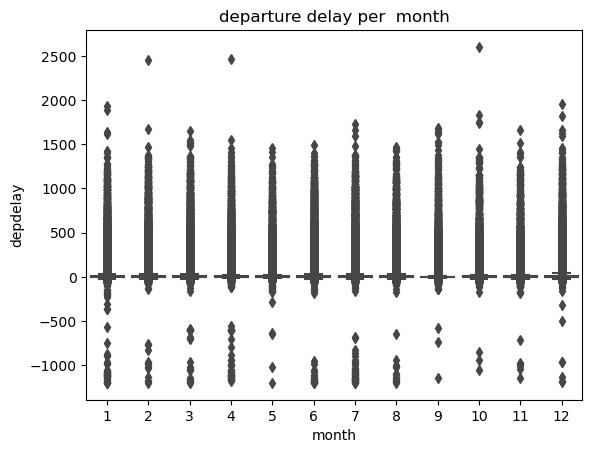

In [215]:
sb.boxplot(data=df1,x='month', y='depdelay')
plt.title('departure delay per  month')

<font size=5>let's focus only on more  or less 1 hour for departue ansd arrival times to have a clear representation

In [4]:
arr_del=df1.loc[(df1['arrdelay'] >-60)&(df1['arrdelay'] <60) ]


In [48]:
dep_del=df1.loc[(df1['depdelay'] >-60)&(df1['depdelay'] <60) ]

Text(0.5, 1.0, 'Arrvial delays per month')

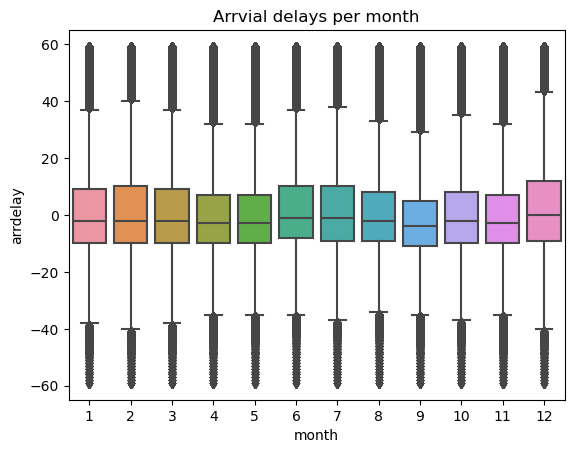

In [217]:
sb.boxplot(data=arr_del, x='month',y='arrdelay')
plt.title('Arrvial delays per month')

Text(0.5, 1.0, 'Departure delays per month')

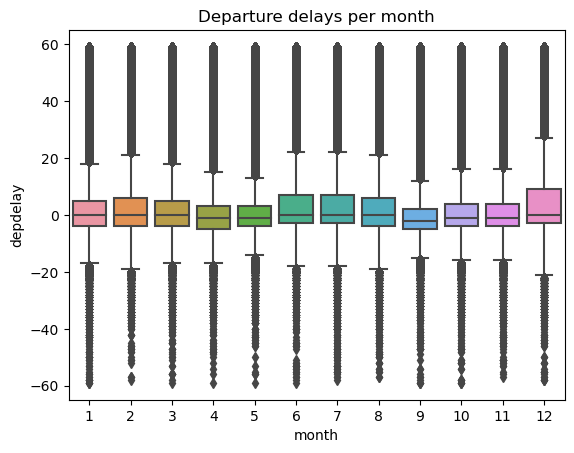

In [218]:
sb.boxplot(data=dep_del, x='month',y='depdelay')
plt.title('Departure delays per month')

<font size=4>there's a slight increase in arrival delays from october to decembre
for departure however, december has a higher percentage of delays

 # 4)  does the day of the week affects ?
 average for each of the 7 days for each year <font color ='red'>scatterplot<font color ='red'>    


<AxesSubplot:xlabel='dayofweek', ylabel='depdelay'>

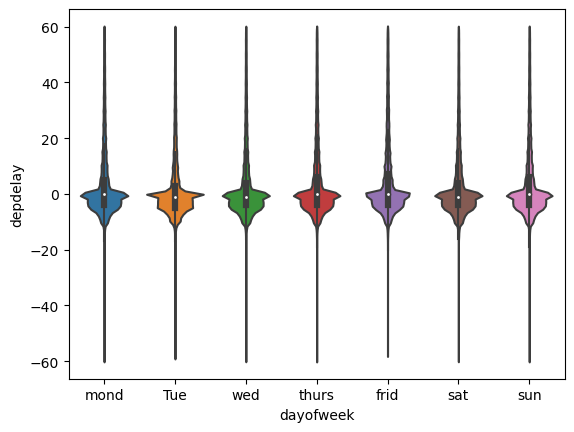

In [221]:
sb.violinplot(data=dep_del,x='dayofweek',y='depdelay')
plt.title('Departure delay average for each day of the week')
plt.xlabel('Departure delay')
plt.ylabel('Day of the week')

<AxesSubplot:xlabel='dayofweek', ylabel='arrdelay'>

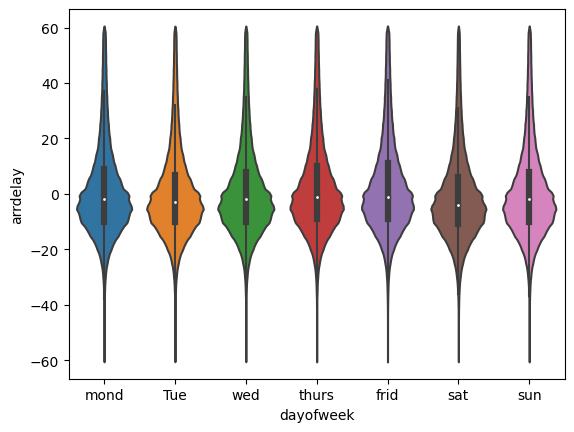

In [222]:
sb.violinplot(data=arr_del,x='dayofweek',y='arrdelay')
plt.title('Arrival delay average for each day of the week')
plt.xlabel('Arrival delay')
plt.ylabel('Day of the week')

<font size=5 color='green'>there's no considerable difference between the days of the week

# 6) does the dep time affects:  delays in function of the departure time


In [55]:
#time1=df1.copy()

#time1=time1[time1.deptime.notnull()]
#time1.deptime=time1.deptime.astype(int)
time1=dep_del

In [ ]:
time1['slot']=time1.loc['deptime'].astype(int)

In [9]:
rang1=range(0,601)
rang2=range(601,1201)
rang3=range(1201,1801)
rang4=range(1801,2501)

In [10]:
time1['slot'].loc[(time1.slot).isin(rang1)]=1
time1['slot'].loc[(time1.slot).isin(rang2)]=2
time1['slot'].loc[(time1.slot).isin(rang3)]=3
time1['slot'].loc[(time1.slot).isin(rang4)]=4

C:\Users\Fatma\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [11]:
time1.slot.value_counts()

2       11452778
3       10860848
4        5879315
1         696843
2533           1
2535           1
2524           1
2510           1
2630           1
2600           1
2555           1
Name: slot, dtype: int64

In [12]:
time1=time1.loc[time1.slot.isin(range(1,5))]

In [ ]:
#time1=time1.loc[(time1['depdelay'] >-60)&(time1['depdelay'] <60) ]

Text(0.5, 1.0, 'departure delay in fuction of departure time')

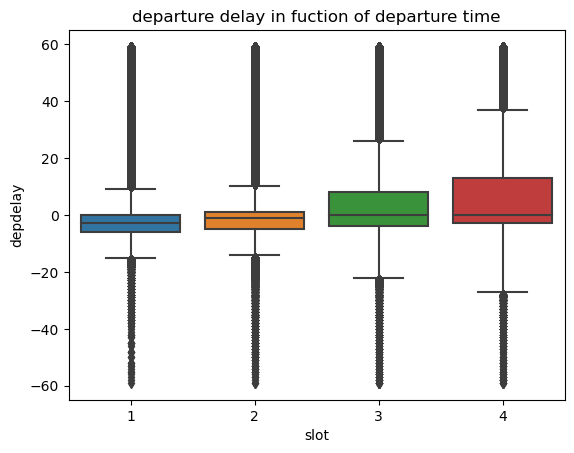

In [13]:
sb.boxplot(data=time1, x='slot', y='depdelay')
plt.title('departure delay in fuction of departure time')

<font size=5 color='green'>Delays are more frequent for flights deparitng between 6pm and midnight

# 8) delays for each carrier : violin plot


In [14]:
order = df1.groupby('carrier')['depdelay'].mean().sort_values().index

Text(0.5, 1.0, 'Departure delay for each carrier')

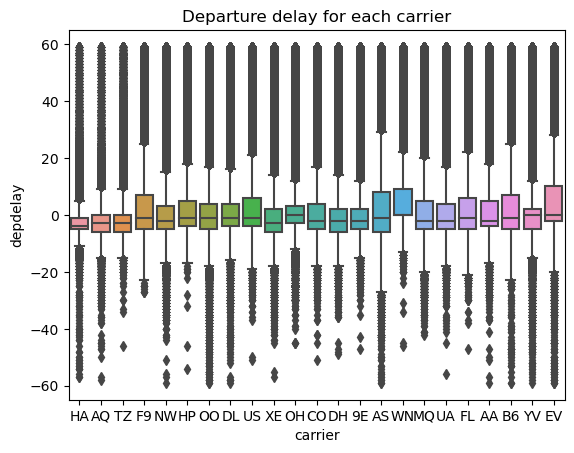

In [16]:
sb.boxplot(dep_del.carrier,dep_del.depdelay, order=order)
plt.title('Departure delay for each carrier')

In [ ]:
time_arr=df[df.arrtime.notnull()]
time_arr=time_arr.loc[(time_arr['arrdelay'] >-60)&(time_arr['arrdelay'] <60) ]
order2 = time_arr.groupby('carrier')['arrdelay'].mean().sort_values().index
sb.boxplot(time_arr.carrier,time_arr.arrdelay, order=order2)
plt.title('Arrival delay for each carrier')

In [ ]:
order, order2

<font size=5, color='green'>are delays related to a specific origin, why some carriers have on average more delays

    
# 9) delays for each carrier for each origin

In [21]:
time2=df1.groupby(['year','carrier','origin']).mean()
time2.reset_index(inplace=True)

In [22]:
time2.sort_values('depdelay', ascending=False,inplace=True)

In [23]:
time2=time2[0:30]

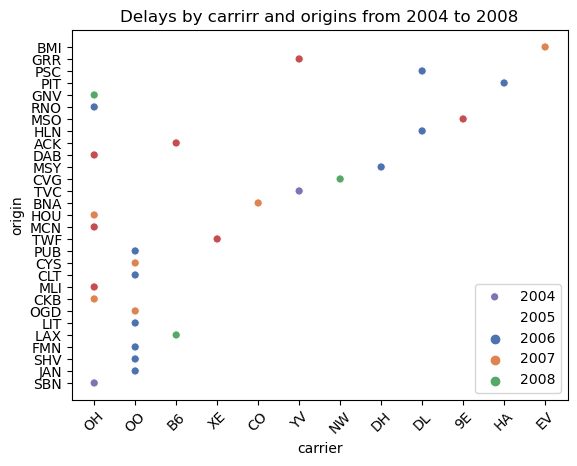

<Figure size 1470x827 with 0 Axes>

In [46]:
plt.title('Delays by carrirr and origins from 2004 to 2008')
scat_plot(time2,'carrier','origin',[2004,2005,2006,2007,2008]);

<font size =4>OO and OH are the two destinations with the highest number of delay. 

In [54]:
#sb.lineplot(data=delay_day, x='day1', y='depdelay')

#sb.relplot(kind='line', data=time2[0:30], y='depdelay', x='year', hue='carrier', aspect=2.5, marker='o')

In [55]:
origins=time2[0:40]['origin'].unique()

In [56]:
time3=time2.loc[time2.origin.isin(origins)]

In [57]:
order3=time3.groupby('origin')['depdelay'].mean().sort_values(ascending=False).index

In [60]:
time3.sort_values('depdelay',ascending=False).head(2)

,year,carrier,origin,month,day,deptime,crsdeptime,arrtime,crsarrtime,flightnum,...,arrdelay,depdelay,distance,cancelled,diverted,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
7651,2008,OH,SBN,4.0,13.0,1538.0,700.0,1634.0,808.0,5111.0,...,506.0,518.0,203.0,0.0,0.0,506.0,0.0,0.0,0.0,0.0
1123,2004,OO,JAN,7.0,28.0,2345.0,1815.0,119.0,2010.0,3882.0,...,309.0,330.0,408.0,0.0,0.0,0.0,309.0,0.0,0.0,0.0


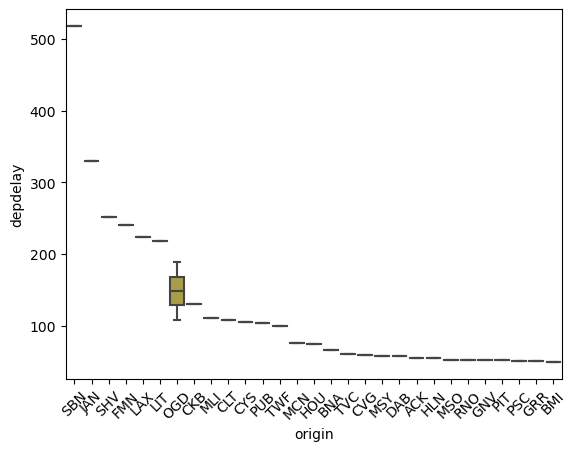

In [59]:
sb.boxplot(data=time3, x='origin',y='depdelay', order=order3)
plt.xticks(rotation=45);

# 10) More common origins and carriers for cancelled flights

In [45]:
df_can1=df2.groupby(['carrier','origin']).sum()
df_can1.reset_index(inplace=True)

In [46]:
df_can1=df_can1.sort_values('cancelled',ascending=False)[0:10]

<AxesSubplot:xlabel='origin', ylabel='carrier'>

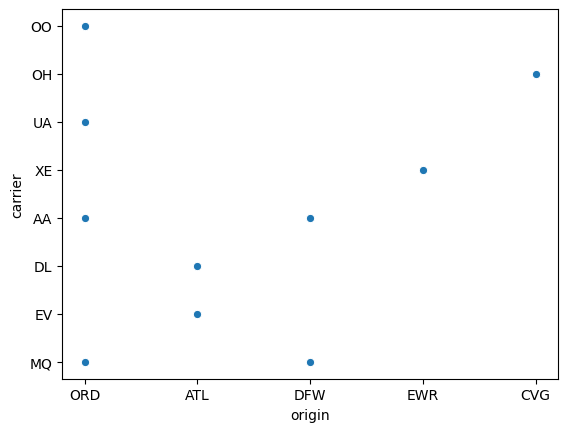

In [47]:
sb.scatterplot(data=df_can1,x='origin', y='carrier')

### What is the structure of your dataset?

> the dataset is CSV files with one for each year. For 2003 and above, columns describing the type of delay were added

### What is/are the main feature(s) of interest in your dataset?

> understand how delays correlates to the time of the year, to the carrier and to the origin and destination

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> many columns will help support the feature of interest. some relation may exist like for instance the of origin with a specific carrier on departure delayes as well as carrier and destination effect on arrival delays

## Conclusions




- There's more delay in arrivals than in departure. It is more probable to have a delay in arrival than to arrive on time and both delays kept increasing each year from 2004 to 2008
- the main delays are more or less one hour from the departure/ arrival time
- Summer and holiday seasons are the periods with the highest delays
- Security check has the shortest delays whereas late air craft and carrier cause the longest delays. let's see how frequent is each type of delay
- Long distance flights are more in time, but it can also be due to the fact that short distance flights are more frequent 
- day of the week doesn't affect delays
- only 7 days appears on the top 30 of the most crowded days and days with the highest delays. it appears that delays are not directly correlated to the number of fligts,it could be due to the lower number of stuff or more passengers in the planes
-  top 4 destinations with arrival delays are: MQT, DUT, SOP, ACK
- top 4 orgins with departure delays are: FMN, OGD, CKB, CYS
- Delays are more frequent for flights deparitng between 6pm and midnight , even though it has less flights than 6 am to 6pm  departure time

## Key Insights 

- over 5 years, 3 airports showed the highest count of cancellation : ORD, ATL , DFW
- In general delays kept increasing over the course of 5 years for both arrivals and departues
- Among the delays reason, nas and late air craft are the most common and those causin the longest delays
- Among the 30 top carrier-origin with the highest delays,  OO and OH are the two carriers with the highest number of delay.
